#Student performance indicator


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [53]:
df=pd.read_csv('data/stud.csv')

##the record of the student file

In [54]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


shape of the dataset

In [55]:
df.shape

(1000, 8)

##check missing values

In [56]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there are no missing values in the dataset

In [57]:
df.duplicated().sum()

np.int64(0)

there are no dupicate values

checking the number of unique values of each column


In [58]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

check data types

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


check the statictics of the dataset

In [60]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


insight

. the mean of the math_core,reading_core,writing_score are near to each other 

. the standard deviation of the three subject is too closer of all the three subject


. while there is mininmum score for maths 0

# exploratory data

In [61]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [62]:
print("categories in the 'gender' variable :    ",end=" ")
print(df['gender'].unique())
print("categories in the 'race_ethnicity' variable :    ",end=" ")
print(df['race_ethnicity'].unique())
print("categories in the 'parental_level_of_education' variable :    ",end=" ")
print(df['parental_level_of_education'].unique())
print("categories in the 'lunch' variable :    ",end=" ")
print(df['lunch'].unique())
print("categories in the 'test_preparation_course' variable :    ",end=" ")
print(df['test_preparation_course'].unique())

categories in the 'gender' variable :     ['female' 'male']
categories in the 'race_ethnicity' variable :     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in the 'parental_level_of_education' variable :     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in the 'lunch' variable :     ['standard' 'free/reduced']
categories in the 'test_preparation_course' variable :     ['none' 'completed']


In [63]:
##define numerical and categorical feature
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='o']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

print('the total no of numerical feature are {}  numerical feature'.format(len(numerical_feature),numerical_feature))
print('the total no of categorical feature are {}  categorical feature'.format(len(categorical_feature),categorical_feature))

the total no of numerical feature are 8  numerical feature
the total no of categorical feature are 5  categorical feature


8 numerical feature

5 categorical featue

In [64]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


##Adding new column total score and average of total score

In [65]:
df['total']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total']/3

In [66]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# so listing out the student who have secured full marks in any of their subjects

In [67]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()
print(f'the total no of students who have secured 100 marks in reading are {reading_full}')
print(f'the total no of students who have secured 100 marks in writing are {writing_full}')
print(f'the total no of students who have secured 100 marks in math are {math_full}')

the total no of students who have secured 100 marks in reading are 17
the total no of students who have secured 100 marks in writing are 14
the total no of students who have secured 100 marks in math are 7


listing out the students who have secured less than 20

In [68]:
reading_full=df[df['reading_score']<=20]['average'].count()
writing_full=df[df['writing_score']<=20]['average'].count()
math_full=df[df['math_score']<=20]['average'].count()
print(f'the total no of students who have secured 20 marks in reading are {reading_full}')
print(f'the total no of students who have secured 20 marks in writing are {writing_full}')
print(f'the total no of students who have secured 20 marks in math are {math_full}')

the total no of students who have secured 20 marks in reading are 1
the total no of students who have secured 20 marks in writing are 3
the total no of students who have secured 20 marks in math are 4


so by looking up the data we can know that

the student has performed well in reading as compared to other subject



# Exploratory data

. histograms

. kernel density function

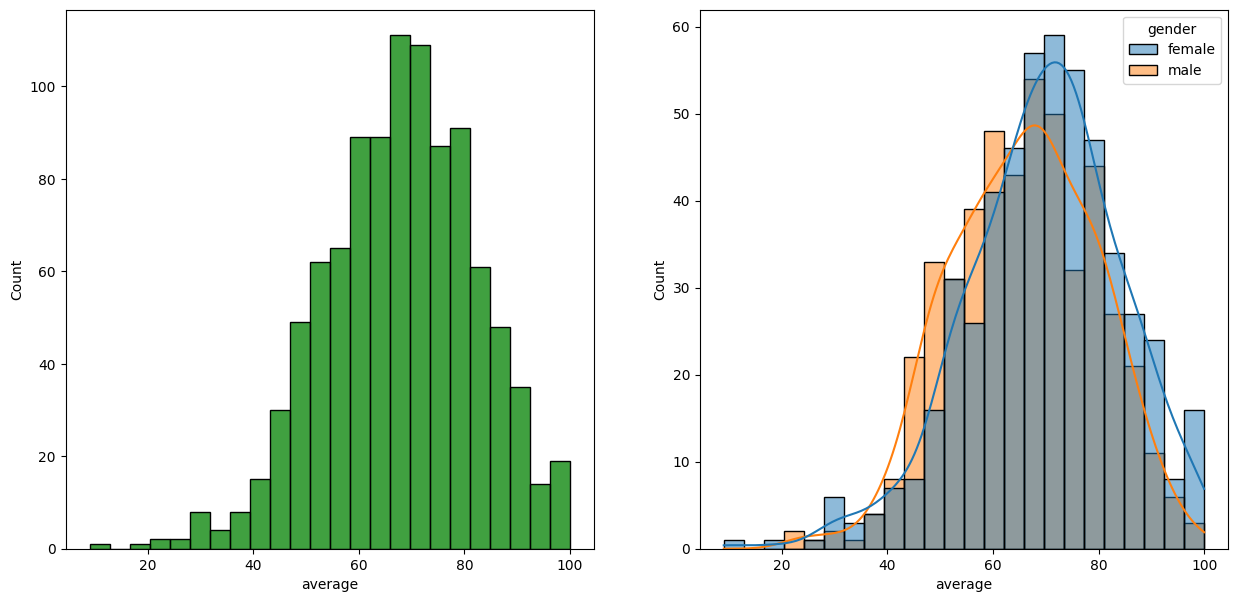

In [69]:
fiq,axs=plt.subplots(1,2 ,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x=df['average'],color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

so by looking we can come to the conclusion that the female performs better as compare to the men

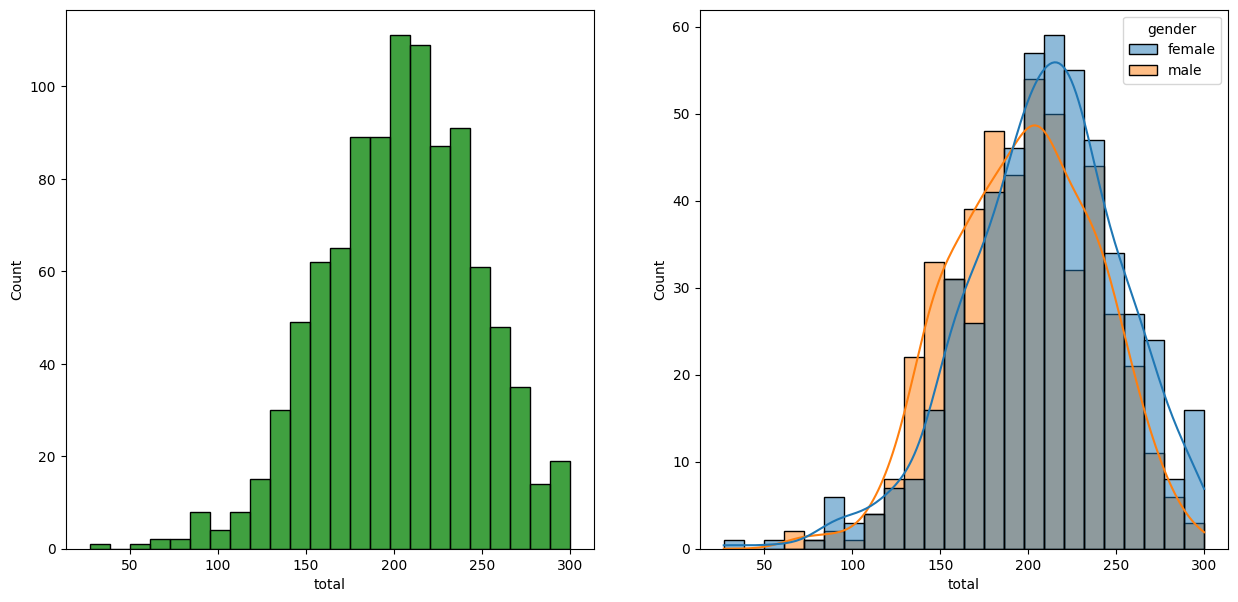

In [70]:
fiq,axs=plt.subplots(1,2 ,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x=df['total'],color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total',kde=True,hue='gender')
plt.show()

the female tends to perform well as compare to the men

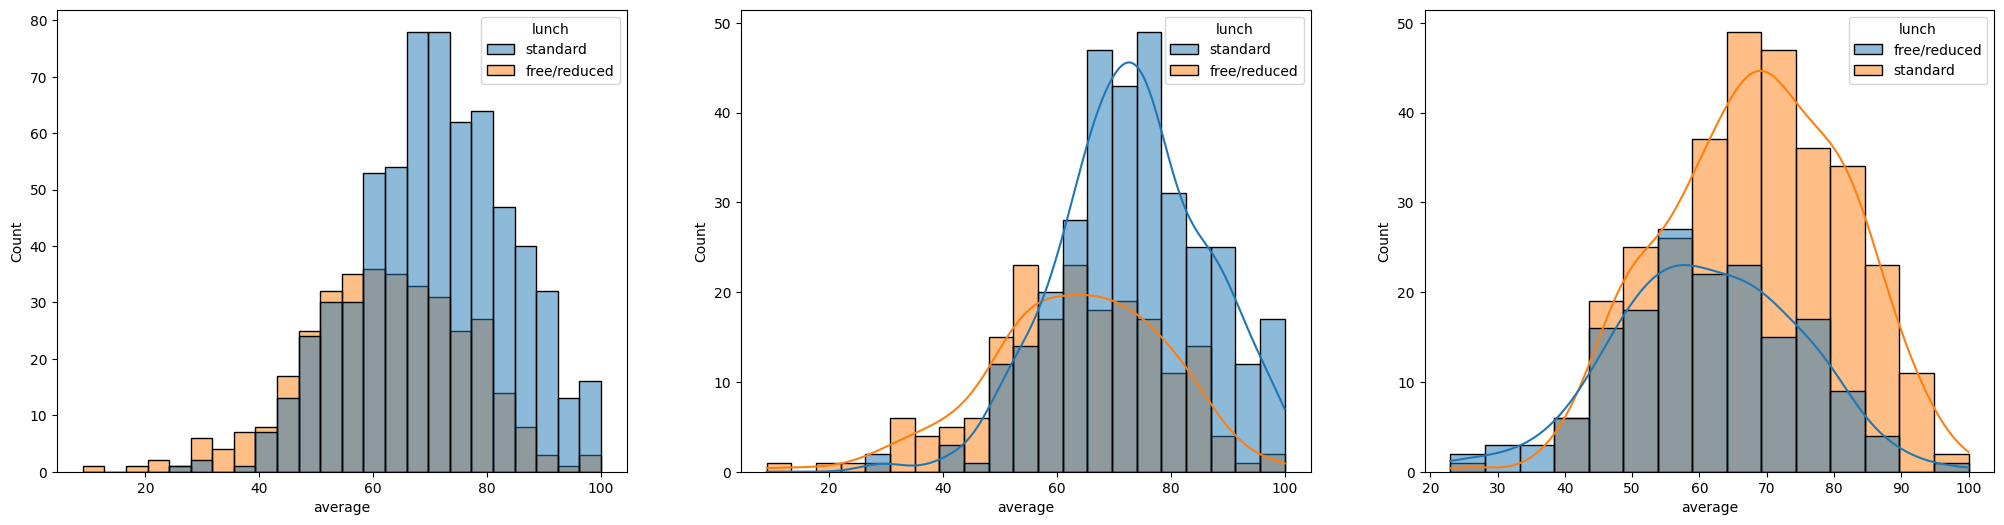

In [71]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x=df['average'],hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x=df['average'],hue='lunch',kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x=df['average'],hue='lunch',kde=True)
plt.show()

standard lunch helps to perform better in exam as compare to non standard

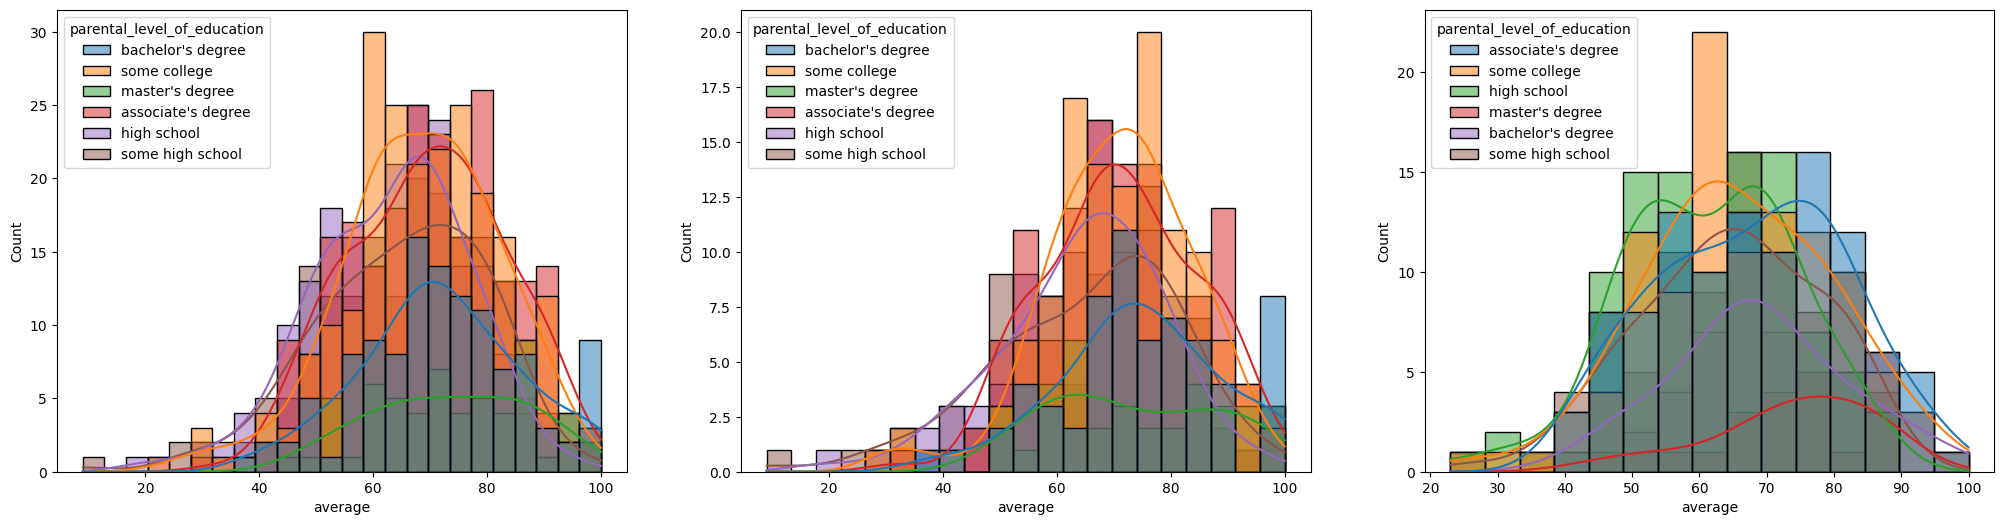

In [72]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x=df['average'],hue='parental_level_of_education',kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x=df['average'],hue='parental_level_of_education',kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x=df['average'],hue='parental_level_of_education',kde=True)
plt.show()

the degree of parents do not have any relation with the student performance

. second plot in case of female the parent degree doent have any effect on female students

. third plot in case of male the parents who have degress of asscociate,somecollege masters theirs children tends to perform well in exams

In [73]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [74]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

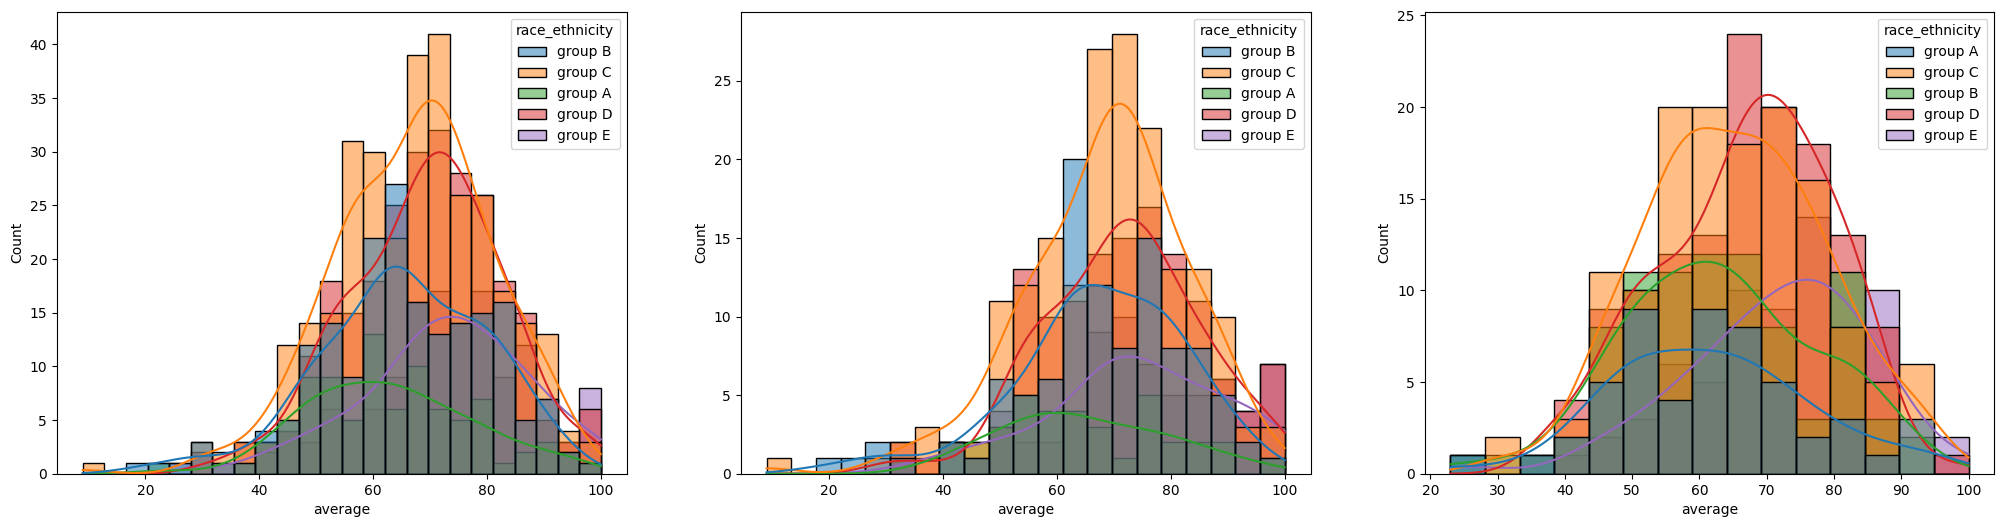

In [75]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x=df['average'],hue='race_ethnicity',kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x=df['average'],hue='race_ethnicity',kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x=df['average'],hue='race_ethnicity',kde=True)
plt.show()

 studnets of group a and group e tends to perform poor even if they are male or female

##maximum scores of students in all three subjects

In [76]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


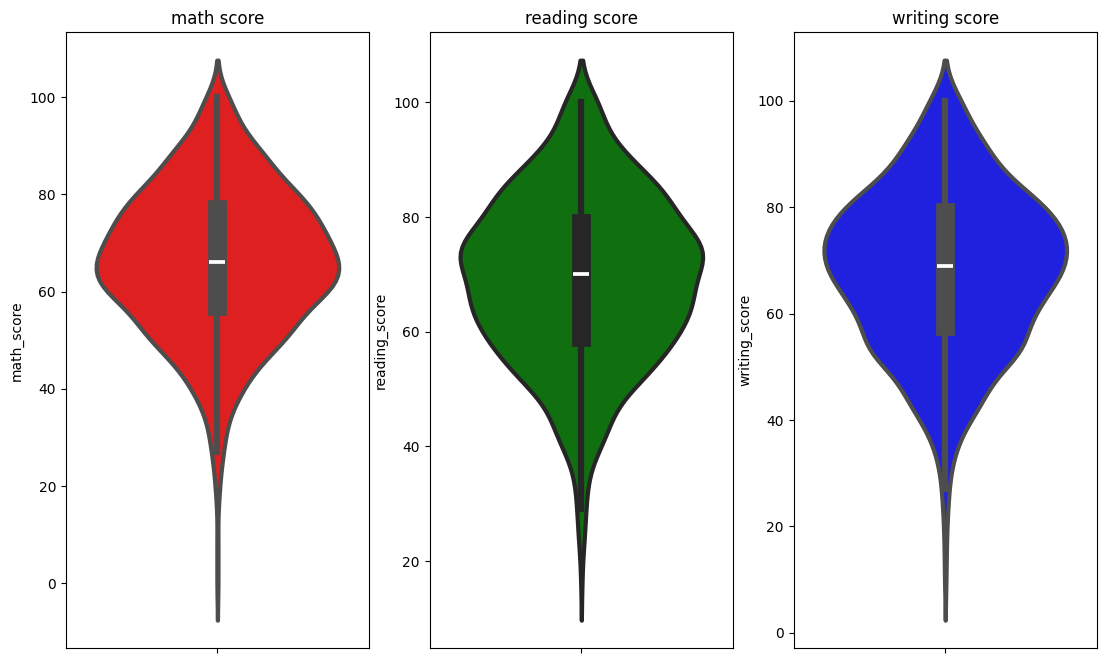

In [77]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('math score')
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('reading score')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('writing score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

. from the above three plots it is clearly visible that most of the students score 60-80 in maths while the rest score was from 50-80 in other reading_score and weiting_score

# MUltivariate analysis using pieplot

In [78]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [79]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

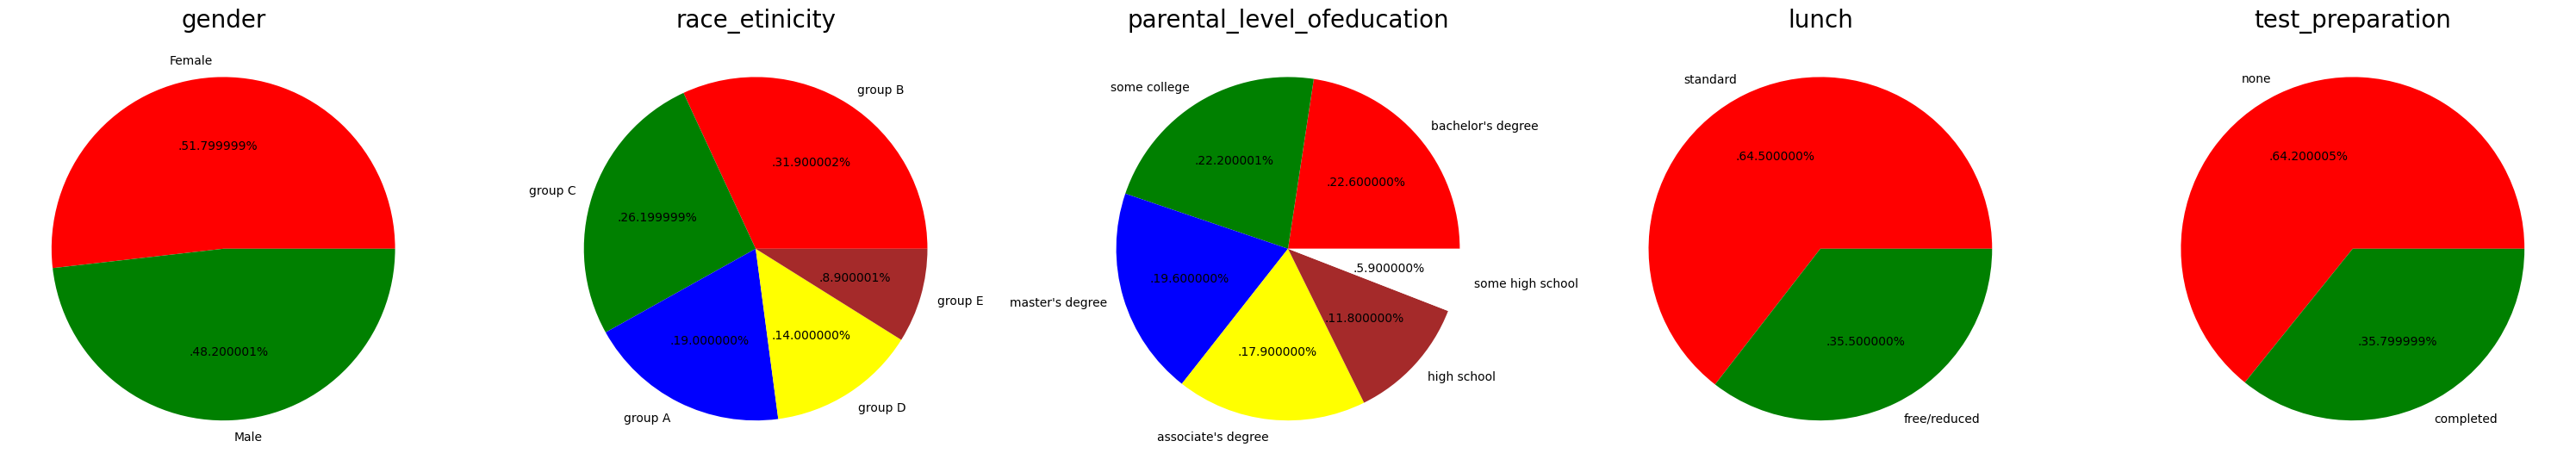

In [80]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)

size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('gender',fontsize=20)
plt.axis('off')
plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels=['group B', 'group C', 'group A', 'group D', 'group E']
color=['red','green','blue','yellow','brown']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('race_etinicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['parental_level_of_education'].value_counts()
labels=["bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school']
color=['red','green','blue','yellow','brown','white']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('parental_level_ofeducation',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels=['standard', 'free/reduced']
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
labels=['none', 'completed']
color=['red','green']

plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('test_preparation',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

insight

.no of male and female are nearly equal

.number of students are more in group c

. the more no of students have standard lunch

. number of students whose parental eduaction is some college is greated followed by associate degree

# gender column
 
 . how is distribution of gender

 . is gender has any impact of student performance

univariate analysis (how is distribution of gender)

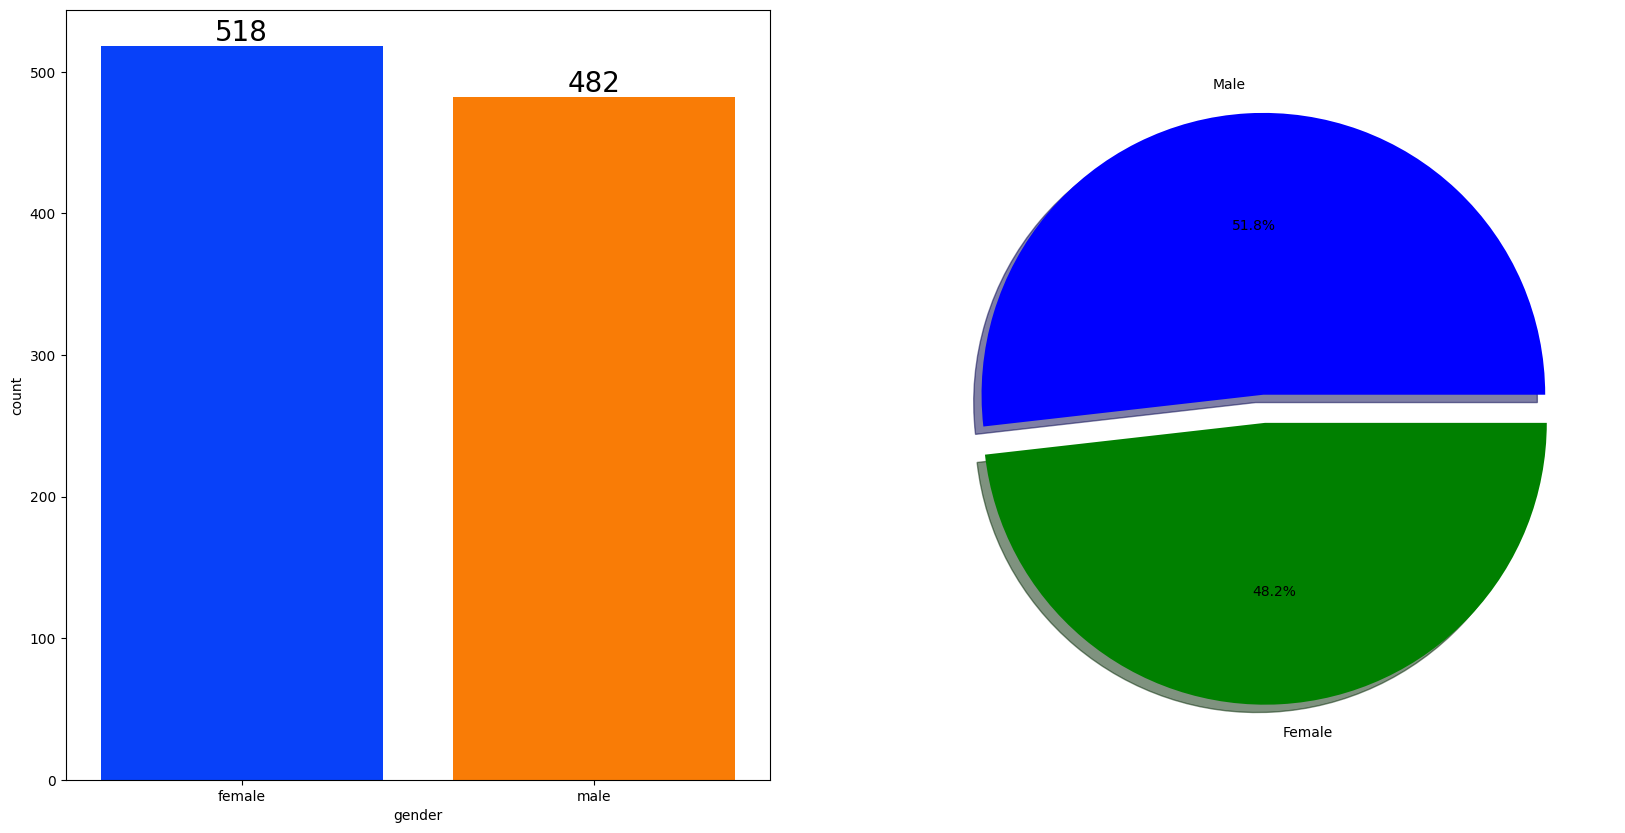

In [81]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['blue','green'])
plt.show()

bivariate analysis (is gender has any impact on student performance)


In [82]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [83]:
gender_group=df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


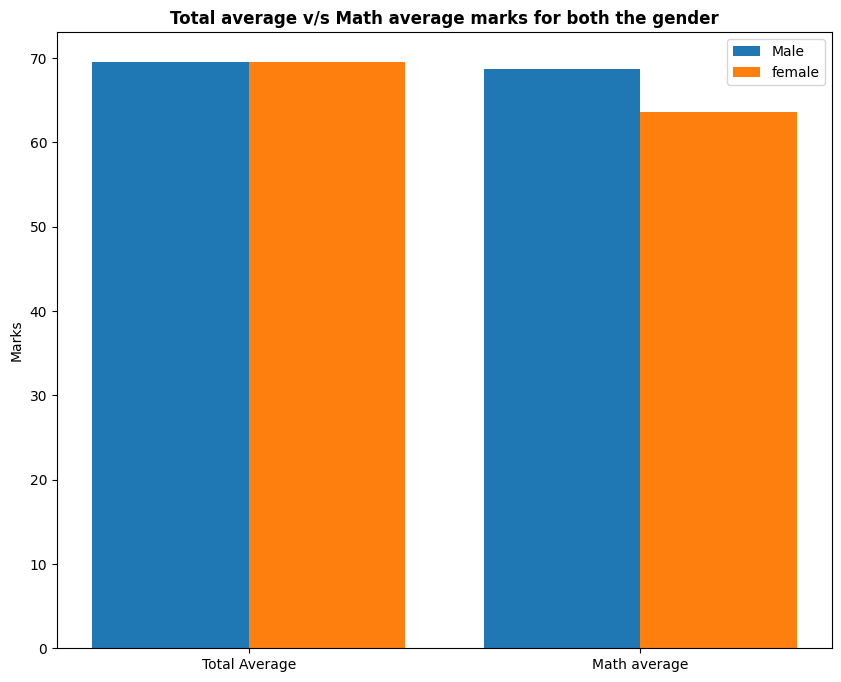

In [84]:
plt.figure(figsize=(10,8))
x=['Total Average','Math average']
female_scores=[gender_group['average'][0],gender_group['math_score'][0]]
male_scores=[gender_group['average'][0],gender_group['math_score'][1]]

X_axis=np.arange(len(x))
plt.bar(X_axis-0.2,male_scores,0.4,label='Male')
plt.bar(X_axis+0.2,female_scores,0.4,label='female')

plt.xticks(X_axis,x)
plt.ylabel('Marks')
plt.title('Total average v/s Math average marks for both the gender',fontweight='bold')
plt.legend()
plt.show()

male has better score in maths than female

# race ethinicity column

. how is group wise distribution

. is race/ethinicity has any impact of student performance

how is group wise distribution

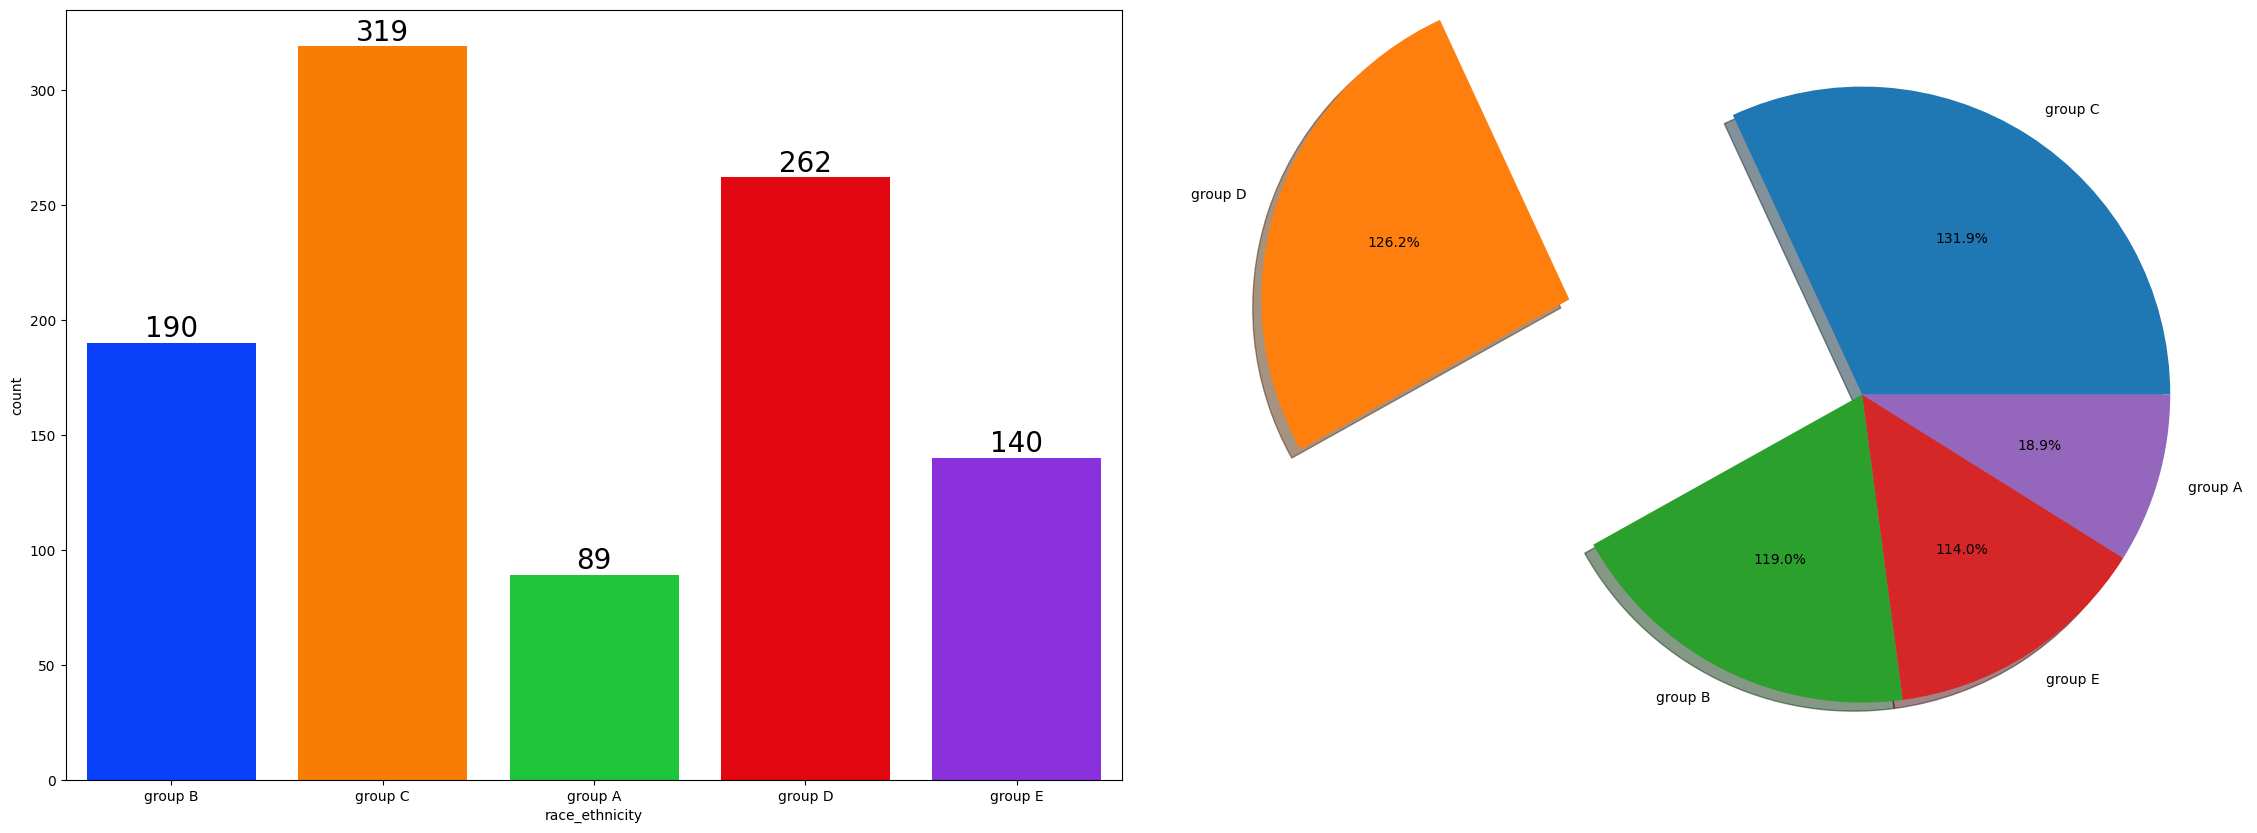

In [85]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=(0,1,0,0,0),autopct='1%.1f%%',shadow=True)
plt.show()

most of the studetns belongs fromm group c and group d

least no of students are from group a

Text(0.5, 1.0, 'writing_score')

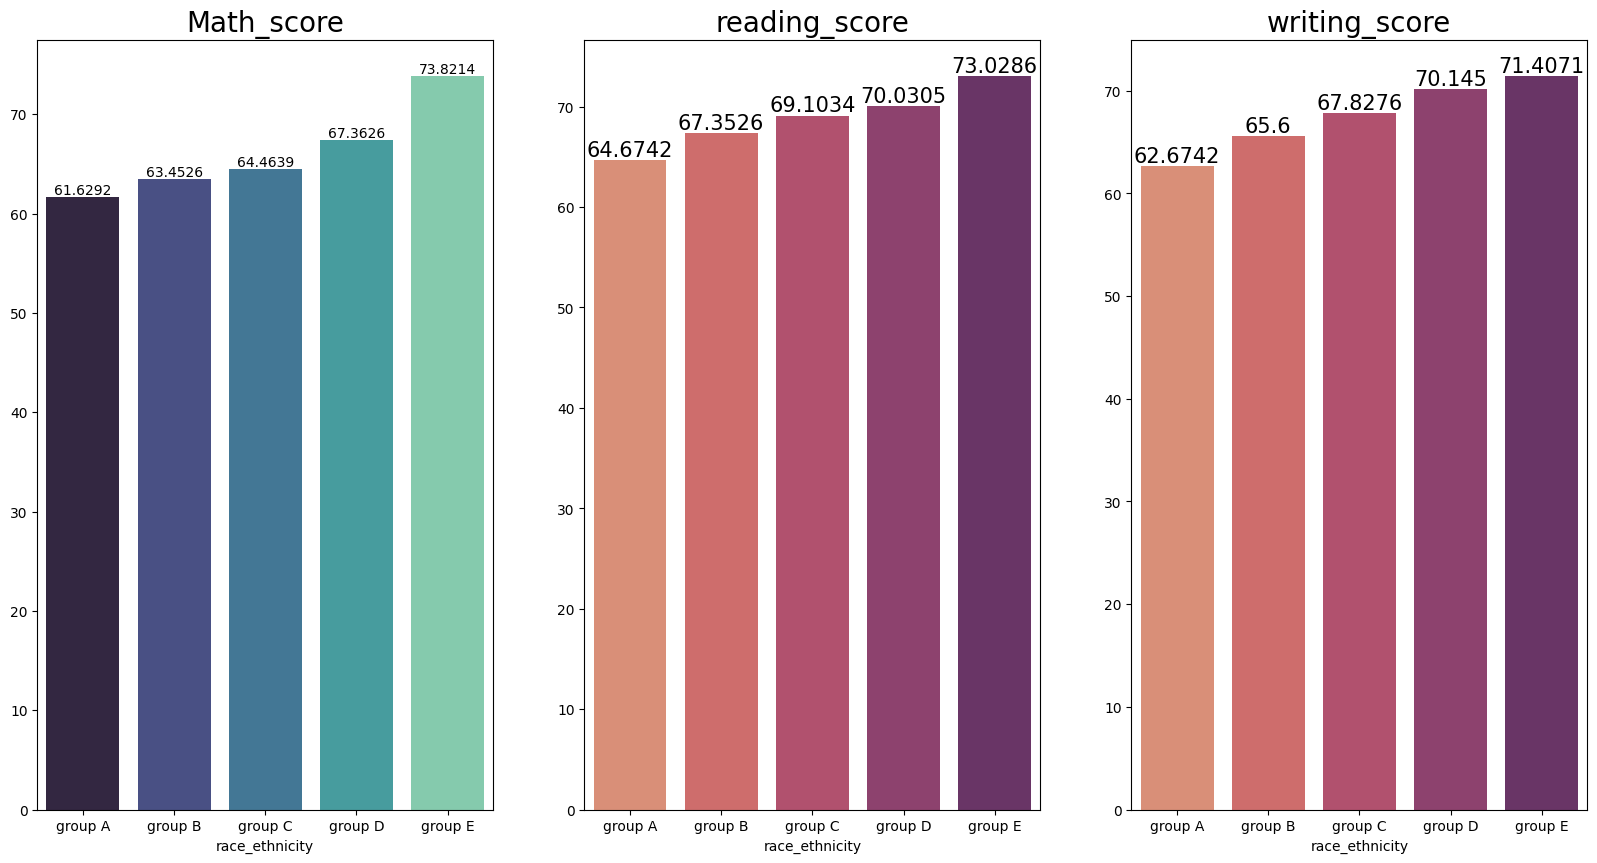

In [106]:
group_by_2=df.groupby('race_ethnicity')
fig,ax=plt.subplots(1,3,figsize=(20,10))
sns.barplot(x=group_by_2['math_score'].mean().index,y=group_by_2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math_score',color='black',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
sns.barplot(x=group_by_2['reading_score'].mean().index,y=group_by_2['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('reading_score',color='black',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
sns.barplot(x=group_by_2['writing_score'].mean().index,y=group_by_2['writing_score'].mean().values,palette='flare',ax=ax[2])
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
ax[2].set_title('writing_score',color='black',size=20)

. students from the group e has scored the highest marks

. students from the group a has scored the lowest marks


# parental level of education

. what is education of the students parents

. does the parental education has any impac on the studnet performance

. 

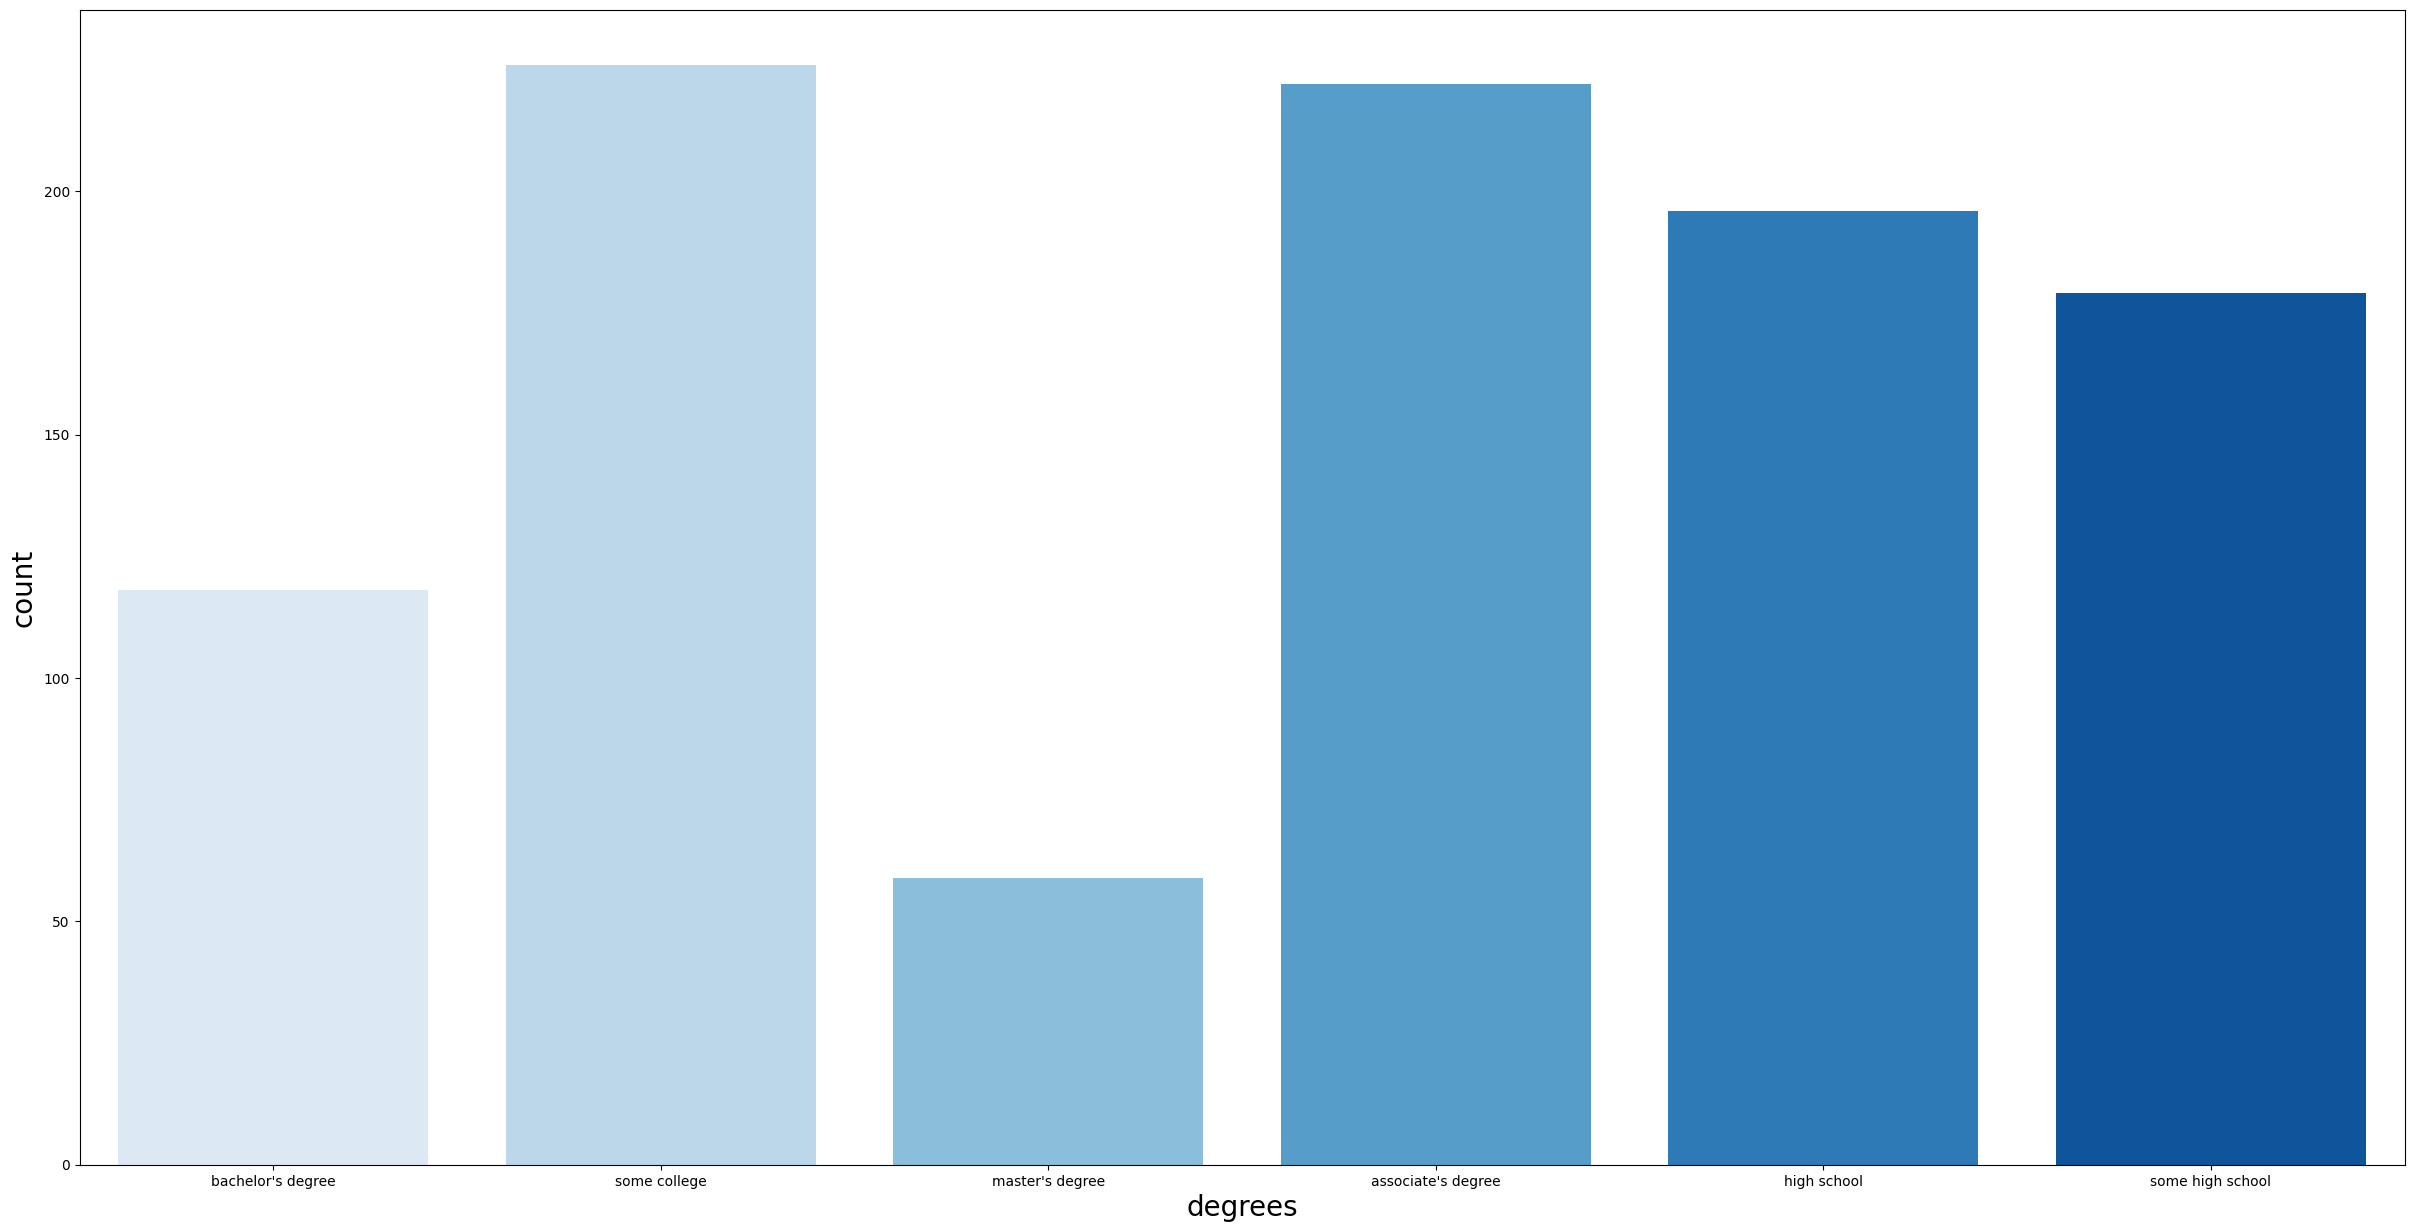

In [119]:
plt.rcParams['figure.figsize']=(30,15)
sns.countplot(x=df['parental_level_of_education'],data=df,palette='Blues',saturation=0.95)
plt.xlabel('degrees',size=20)
plt.ylabel('count',size=20)
plt.show()


insight

. largest no of parents are from the some degree and the least is master degree

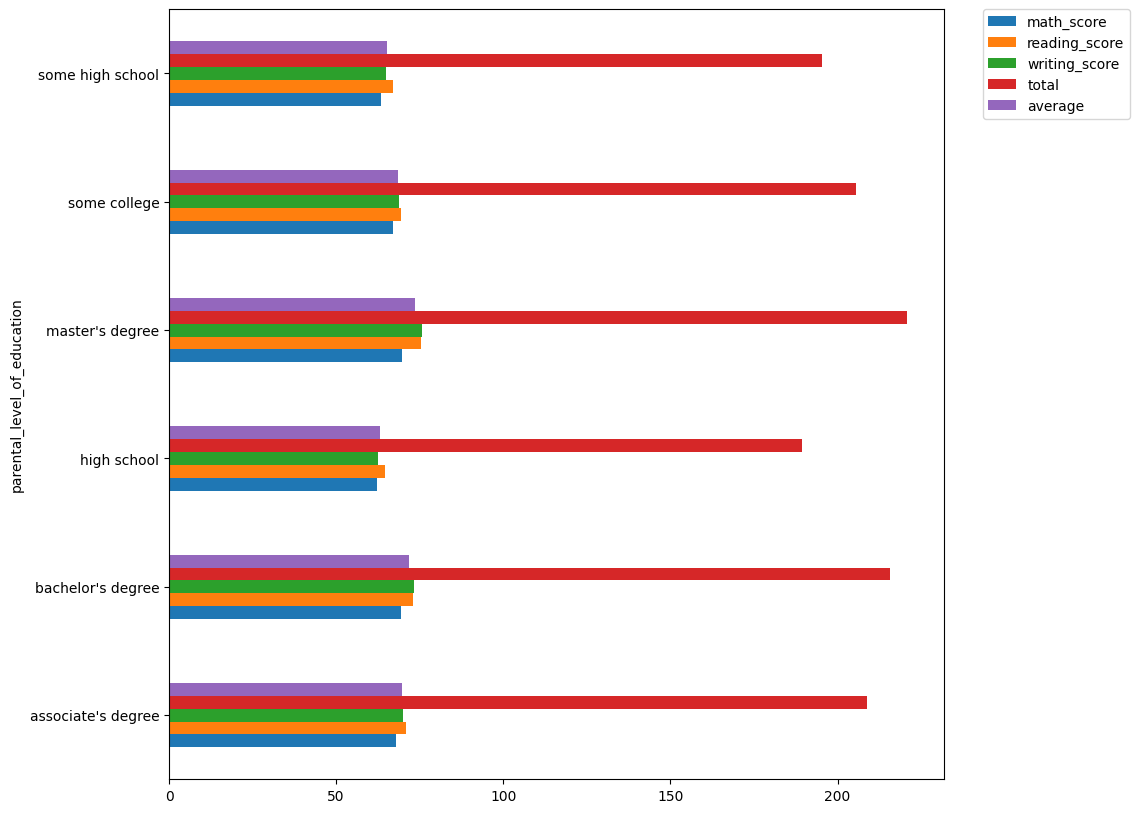

In [126]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

the score of the students whose parent poses master , bachelor and associative have higher marks

# lunch column

. which type of lunch is most common an=mon the student

. does the lunch has any impact on the student performance

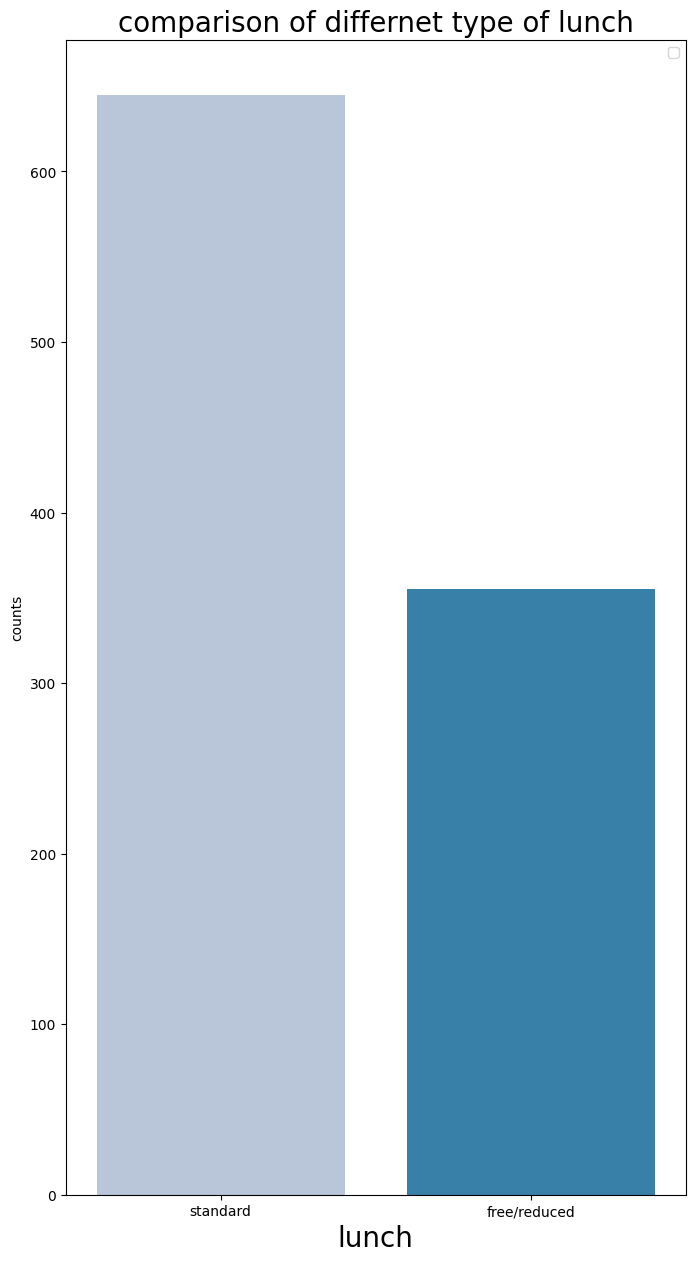

In [136]:
plt.rcParams['figure.figsize']=(8,15)
sns.countplot(x=df['lunch'],data=df,palette='PuBu')
plt.title('comparison of differnet type of lunch',size=20)
plt.xlabel('lunch',size=20)
plt.ylabel('counts')
plt.legend()
plt.show()

. students being served standard lunch was more than free/reduce lunch

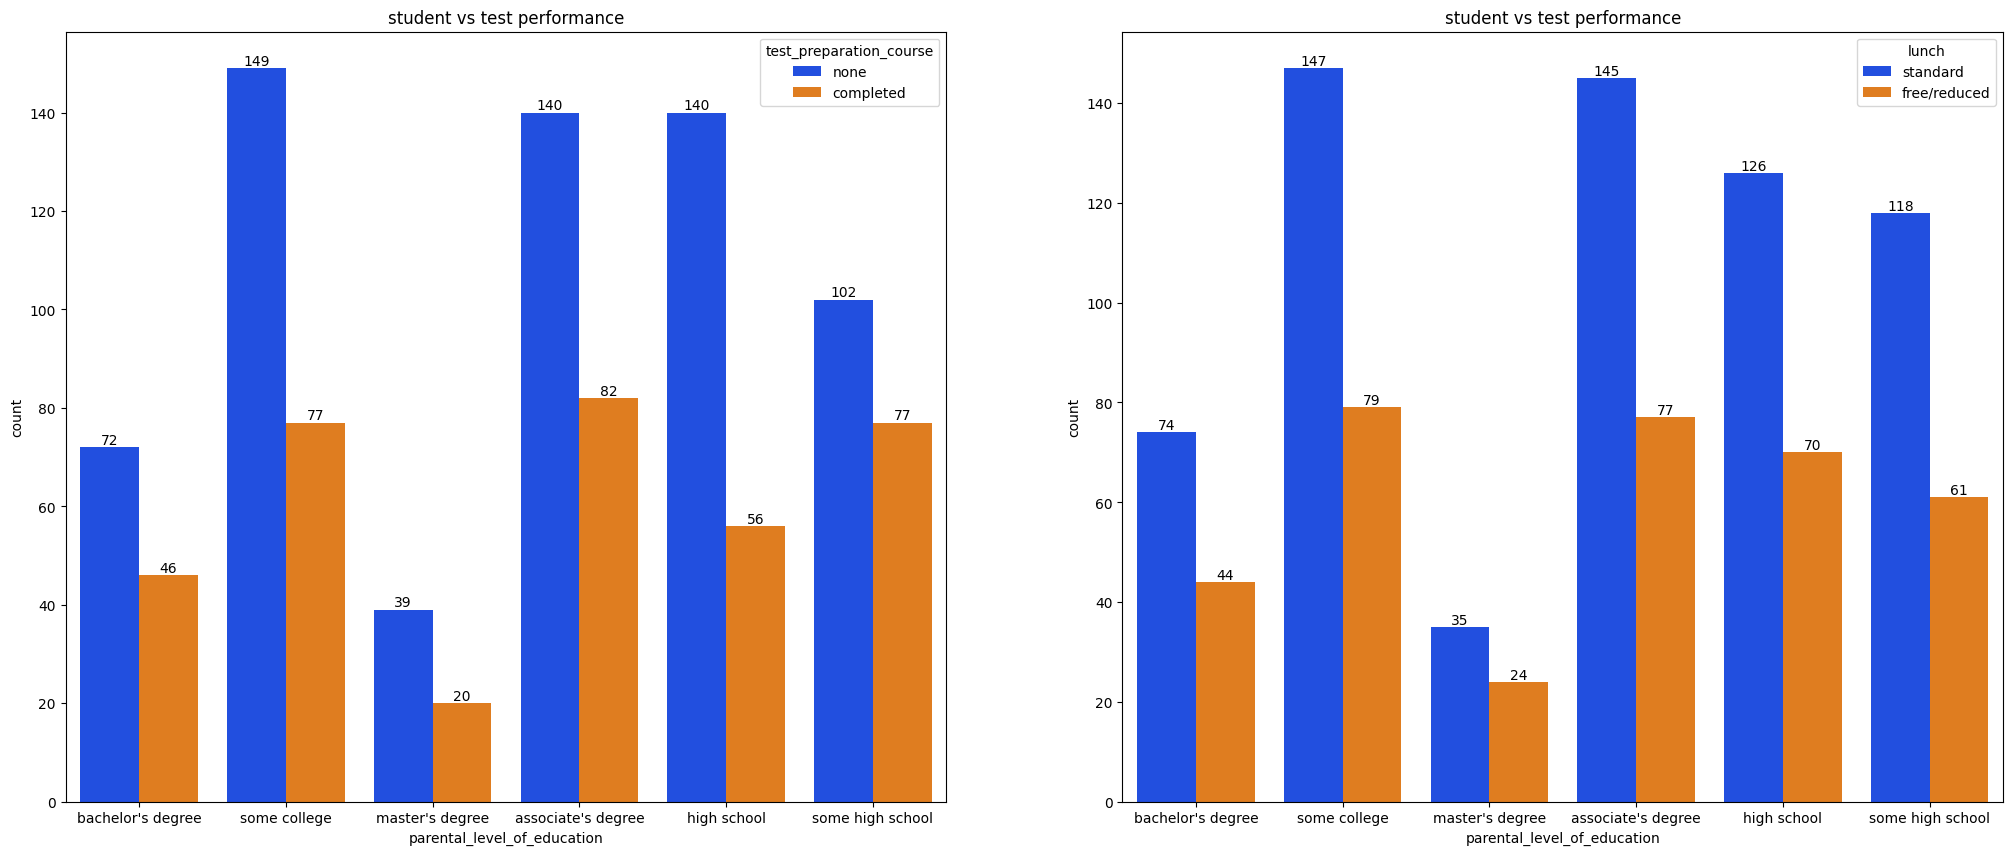

In [149]:
f,ax=plt.subplots(1,2,figsize=(25,10))

sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course',ax=ax[0])
ax[0].set_title('student vs test performance')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='lunch',ax=ax[1])
ax[1].set_title('student vs test performance')
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10)

# test preparation column

. which type of lunch is mostly common among the student

. is test preparation has any impact on the student performance

<Axes: xlabel='test_preparation_course', ylabel='count'>

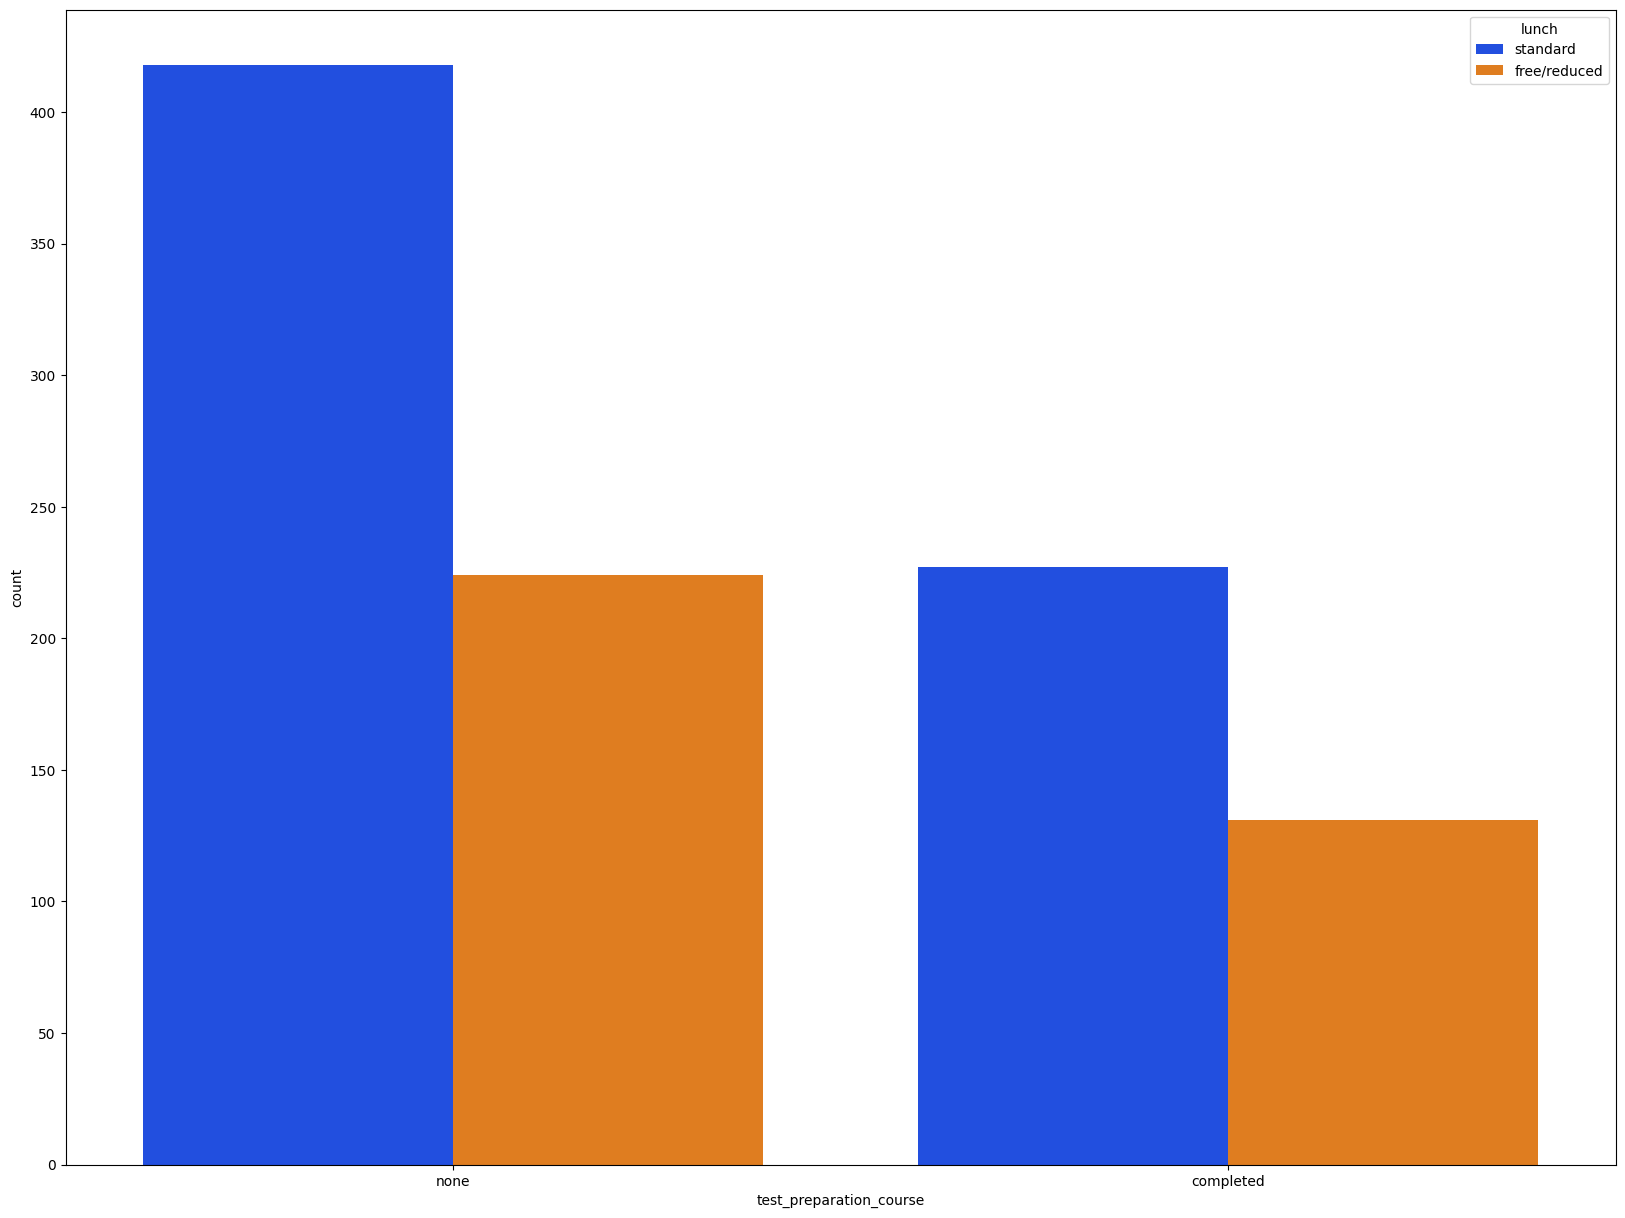

In [150]:
plt.rcParams['figure.figsize']=(20,15)
sns.countplot(x=df['test_preparation_course'],data=df,palette='bright',hue='lunch')

the student who havent taken any course have a higher number of having standard lunch then the student who have taken the course

<Figure size 1800x1000 with 0 Axes>

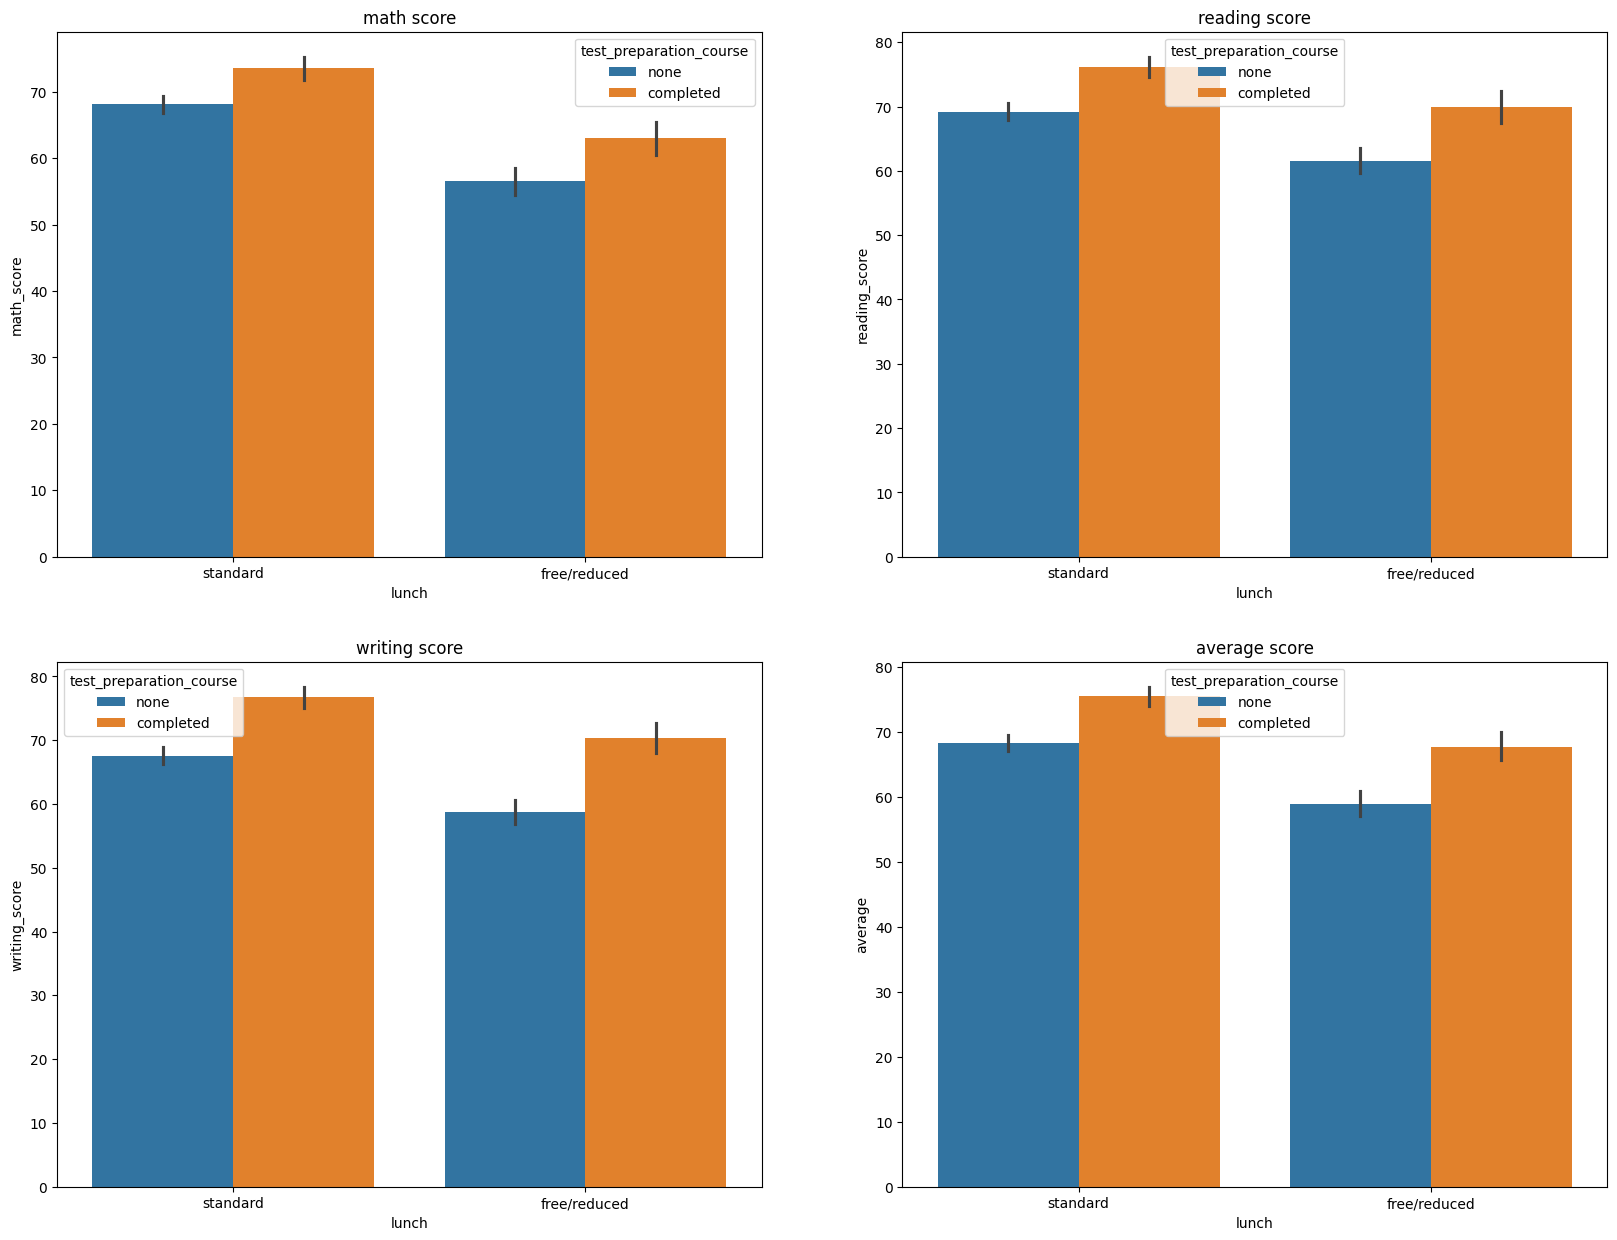

In [159]:
plt.figure(figsize=(18,10))
plt.subplots(2,2)
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],data=df,y=df['math_score'],hue='test_preparation_course')
plt.title('math score')
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],data=df,y=df['reading_score'],hue='test_preparation_course')
plt.title('reading score')
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],data=df,y=df['writing_score'],hue='test_preparation_course')
plt.title('writing score')
plt.subplot(2,2,4)
sns.barplot(x=df['lunch'],data=df,y=df['average'],hue='test_preparation_course')
plt.title('average score')
plt.show()

the student who have taken the course and have a standard lunch tends to perform well in all the subjects 

<Figure size 1800x1000 with 0 Axes>

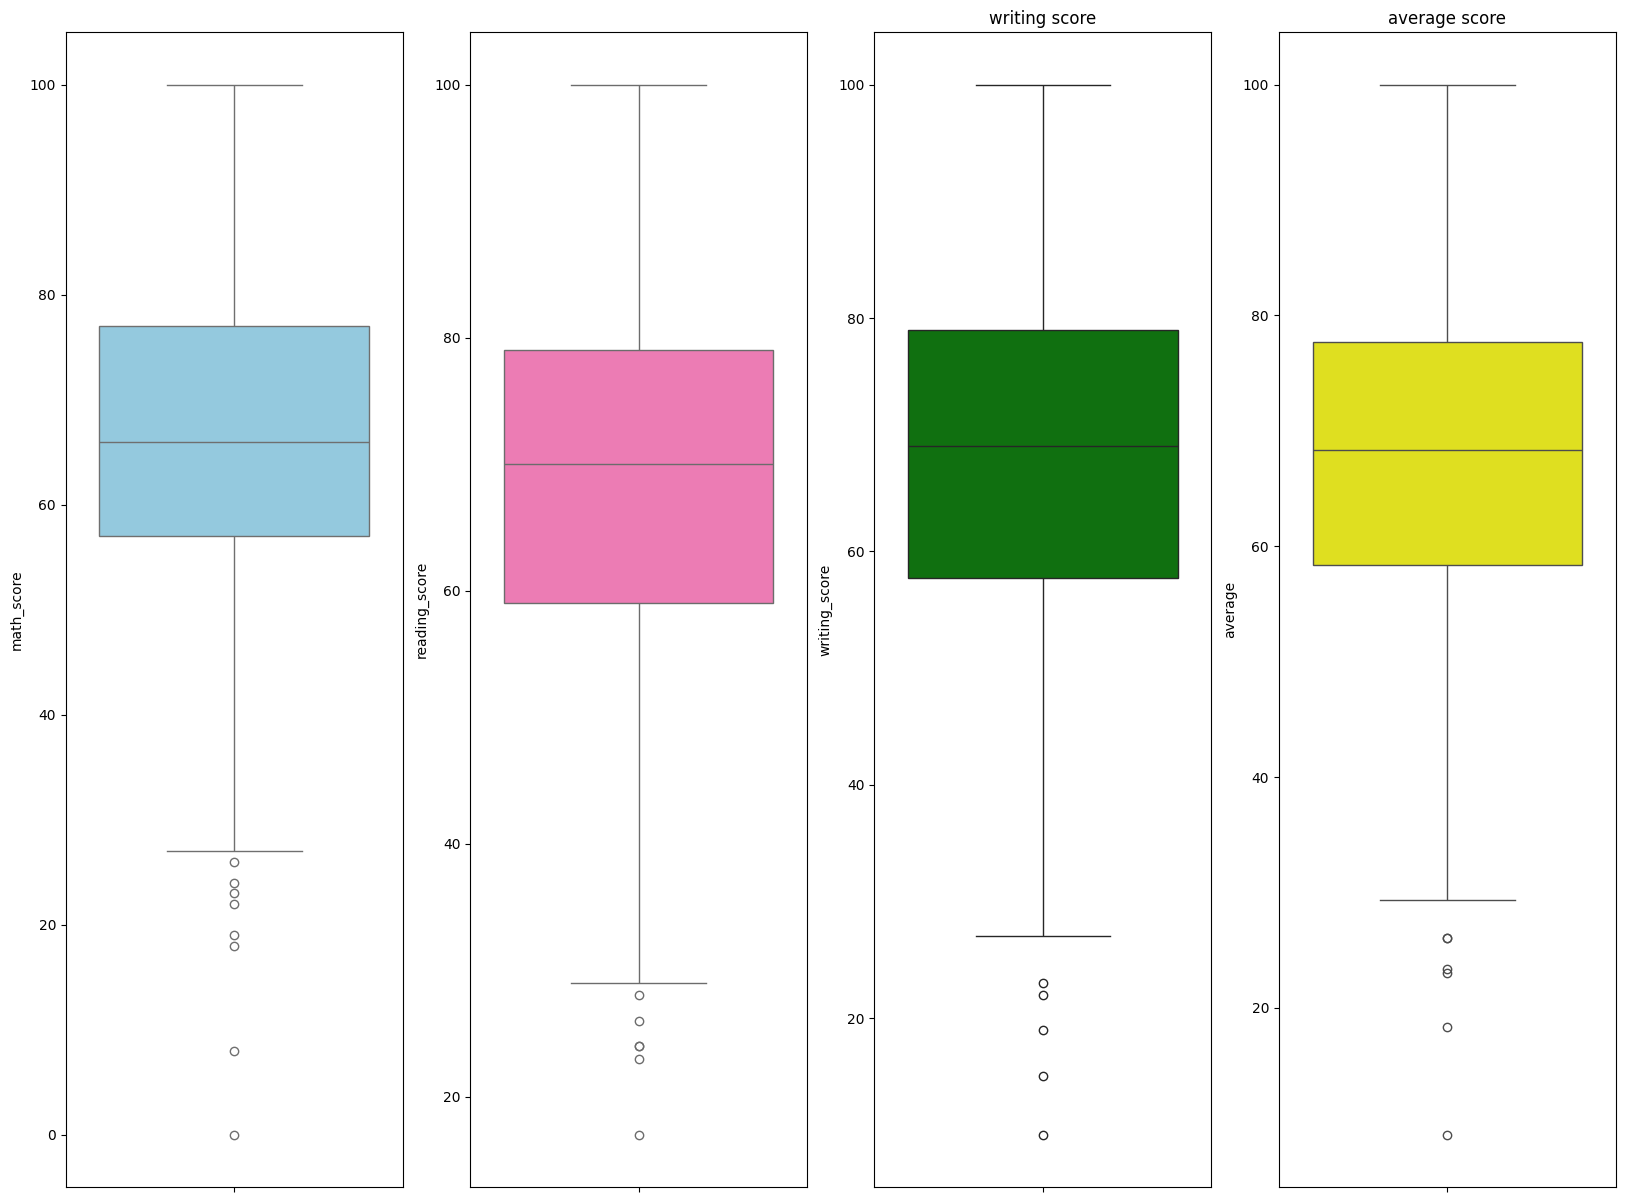

In [162]:
plt.figure(figsize=(18,10))
plt.subplots(1,4)
plt.subplot(1,4,1)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['reading_score'],color='hotpink')

plt.subplot(1,4,3)
sns.boxplot(df['writing_score'],color='green')
plt.title('writing score')
plt.subplot(1,4,4)
sns.boxplot(df['average'],color='yellow')
plt.title('average score')
plt.show()

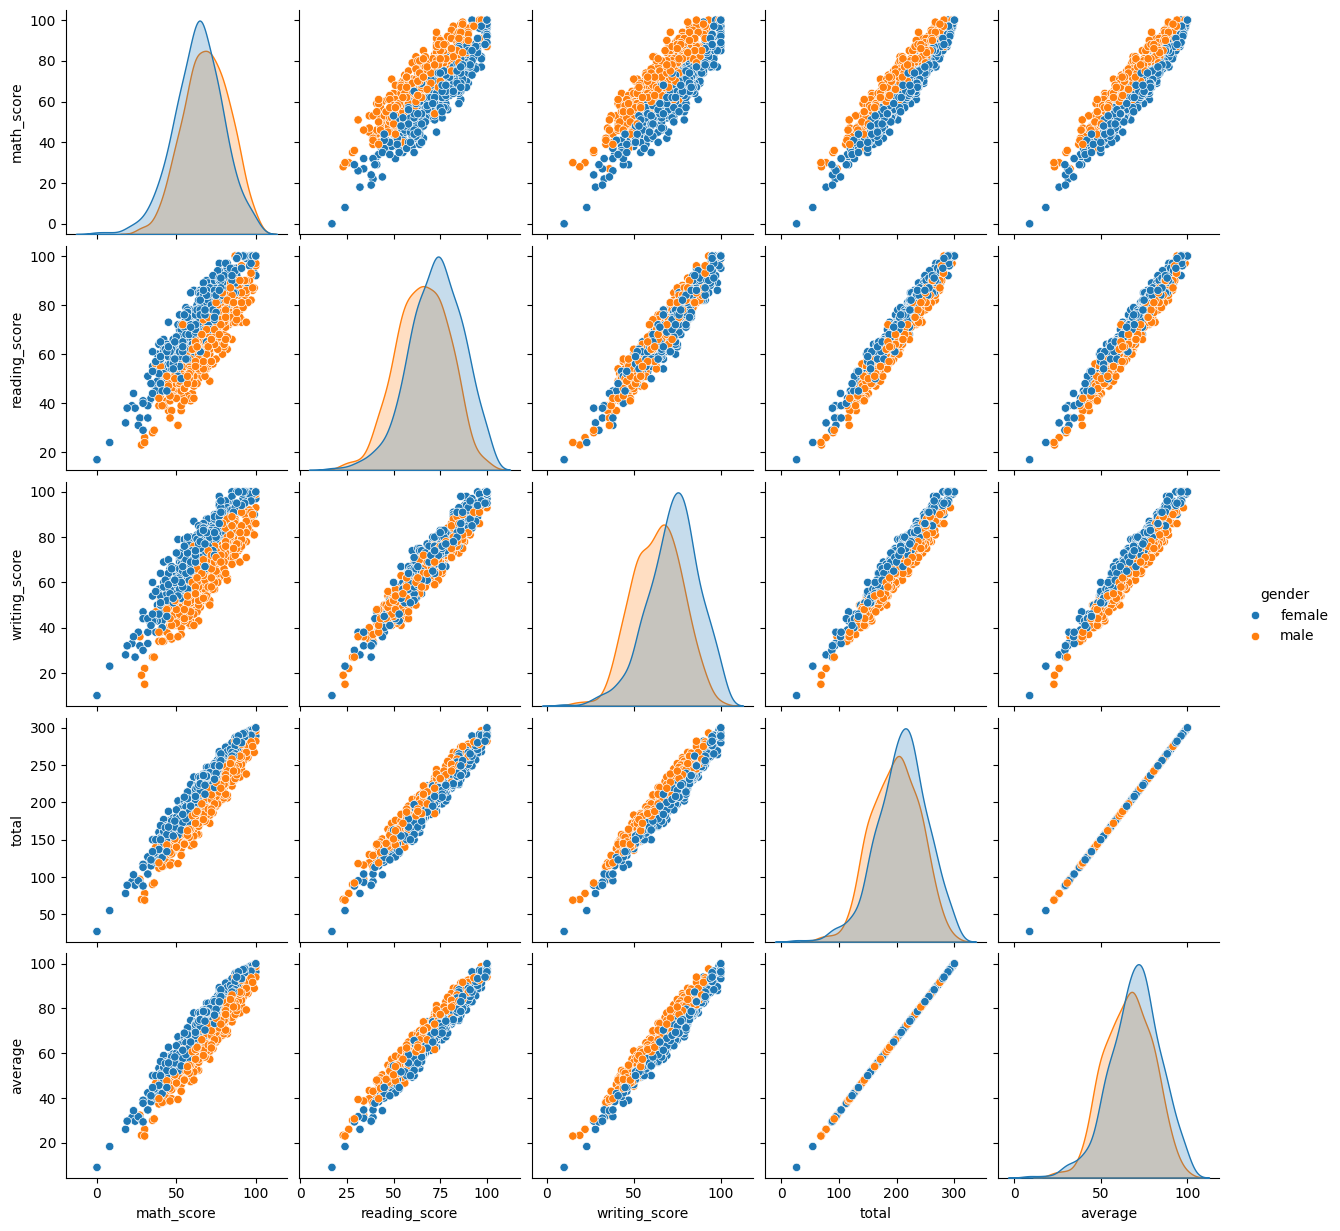

In [163]:
sns.pairplot(df,hue='gender')
plt.show()

from the above plot it is clear that all the scores increases linearly with each other

# conclusions

. students performance is related with lunch ,parental education ,race etjinicity
. students performance is not much related with tet preparation  course
. finishing course is benefecial